# Extracting Features

In [22]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [23]:
# Load the adjacency matrix into a numpy array.
normal_mat = np.loadtxt('../Normal.txt', dtype=int)
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))

Number Of Edges:  1490
Number Of Nodes:  70


# Edge to Vector

In [24]:
edges = list(G_Normal.edges)
node_list_1 = [item[0] for item in edges]
node_list_2 = [item[1] for item in edges]
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))

In [25]:
fb_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

fb_df.head()

,node_1,node_2
0,0,1
1,0,2
2,0,4
3,0,5
4,0,6


In [36]:
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())
adj_G = nx.to_numpy_matrix(G,nodelist = node_list)
adj_G.shape
print("Number Of Edges: ",len(G.edges()))
print("Number Of Nodes: ",len(G.nodes()))

Number Of Edges:  1490
Number Of Nodes:  68


In [27]:
edges = list(G_Normal.edges)
node_list_1 = [item[0] for item in edges]
node_list_2 = [item[1] for item in edges]
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))
print(len(node_list))

68


In [28]:
df_AllNodes = pd.DataFrame()
AA = []
PA = []
RAI = []
JC = []
CSH = []
RAISH = []
WIC = []
_node1 = []
_node2 = []
target = []
CN=[]


In [29]:
for i in node_list:
    for j in node_list:
        if i != j:
            _node1.append(i)
            _node2.append(j)
            AA.append(list(nx.adamic_adar_index(G,ebunch=[(i,j)]))[0][2])
            RAI.append(list(nx.resource_allocation_index(G,ebunch=[(i,j)]))[0][2])
            PA.append(list(nx.preferential_attachment(G,ebunch=[(i,j)]))[0][2])
            JC.append(list(nx.jaccard_coefficient(G,ebunch=[(i,j)]))[0][2])
            CN.append(len(list(nx.common_neighbors(G, i, j))))
            #CNC.append(list(nx.common_neighbor_centrality(G, ebunch=[(i, j)]))[0][2])
            if G.has_edge(i,j)==True:
                target.append(1)
            else:
                target.append(0)

In [30]:
df_AllNodes['node1'] = _node1
df_AllNodes['node2'] = _node2     
df_AllNodes['AA'] = AA     
df_AllNodes['RAI'] = RAI
df_AllNodes['PA'] = PA
df_AllNodes['JC'] = JC 
df_AllNodes['CN'] = CN
#df_AllNodes['CNC'] = CNC 



df_AllNodes['Target'] = target

In [31]:
df_AllNodes.head(5)

,node1,node2,AA,RAI,PA,JC,CN,Target
0,0,1,8.629530,0.725473,1813,0.622642,33,1
1,0,2,8.919526,0.757370,1850,0.641509,34,1
2,0,4,6.969278,0.563268,1295,0.600000,27,1
3,0,5,7.374409,0.633878,1147,0.700000,28,1
4,0,6,9.472994,0.812668,1702,0.765957,36,1


In [33]:
G_Normal_complement = nx.complement(G_Normal)
print("Number Of Edges: ",len(G_Normal_complement.edges()))
print("Number Of Nodes: ",len(G_Normal_complement.nodes()))


Number Of Edges:  925
Number Of Nodes:  70


C:\Users\Divay Mohan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


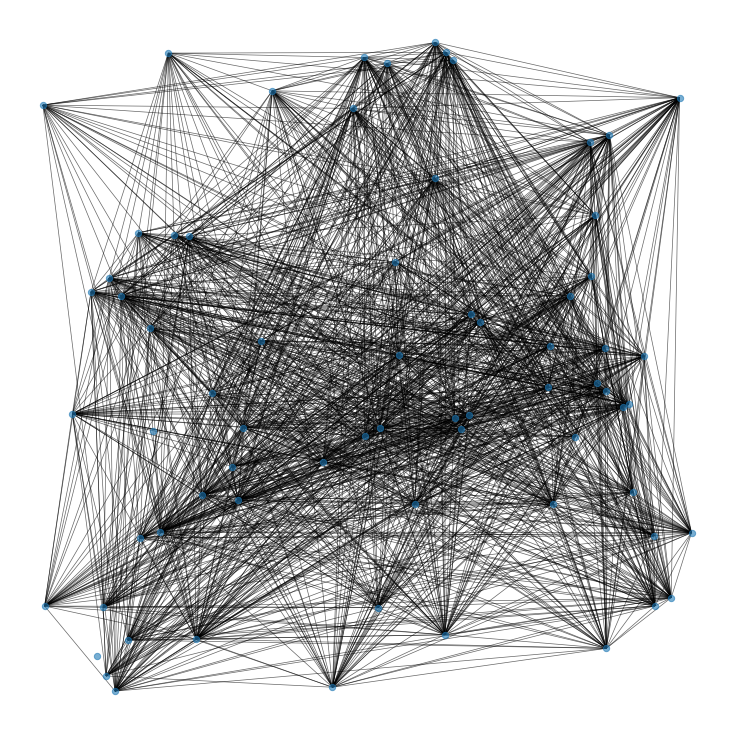

In [34]:
plt.figure(figsize=(10,10))
pos = nx.random_layout(G_Normal, seed=23)
nx.draw(G_eMCI, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)
plt.show()

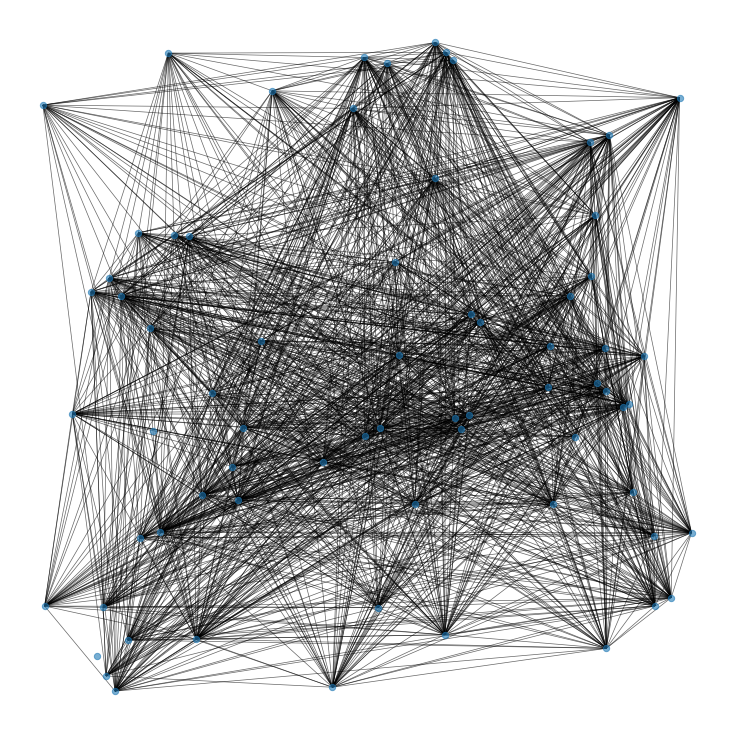

In [35]:
plt.figure(figsize=(10,10))
pos = nx.random_layout(G_Normal_complement, seed=23)
nx.draw(G_eMCI, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)
plt.show()

In [14]:
G = nx.from_pandas_edgelist(fb_df, "node_1", "node_2", create_using=nx.Graph())
adj_G = nx.to_numpy_matrix(G,nodelist = node_list)
adj_G.shape

(70, 70)

In [16]:
edges = list(G_Normal_complement.edges)
node_list_1 = [item[0] for item in edges]
node_list_2 = [item[1] for item in edges]
# combine all nodes in a list
node_list = node_list_1 + node_list_2

# remove duplicate items from the list
node_list = list(dict.fromkeys(node_list))
print(node_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 45, 47, 48, 50, 51, 52, 53, 54, 55, 57, 59, 63, 66, 41, 43, 46, 49, 56, 58, 60, 61, 62, 64, 65, 67, 68, 69]


In [17]:
df_AllNodes = pd.DataFrame()
AA = []
PA = []
RAI = []
JC = []
CSH = []
RAISH = []
WIC = []
_node1 = []
_node2 = []
target = []
CN=[]


In [18]:
for i in node_list:
    for j in node_list:
        if i != j:
            _node1.append(i)
            _node2.append(j)
            AA.append(list(nx.adamic_adar_index(G,ebunch=[(i,j)]))[0][2])
            RAI.append(list(nx.resource_allocation_index(G,ebunch=[(i,j)]))[0][2])
            PA.append(list(nx.preferential_attachment(G,ebunch=[(i,j)]))[0][2])
            JC.append(list(nx.jaccard_coefficient(G,ebunch=[(i,j)]))[0][2])
            CN.append(len(list(nx.common_neighbors(G, i, j))))
            #CNC.append(list(nx.common_neighbor_centrality(G, ebunch=[(i, j)]))[0][2])
            if G.has_edge(i,j)==True:
                target.append(1)
            else:
                target.append(0)

In [19]:
df_AllNodes['node1'] = _node1
df_AllNodes['node2'] = _node2     
df_AllNodes['AA'] = AA     
df_AllNodes['RAI'] = RAI
df_AllNodes['PA'] = PA
df_AllNodes['JC'] = JC 
df_AllNodes['CN'] = CN
#df_AllNodes['CNC'] = CNC 



df_AllNodes['Target'] = target

In [20]:
df_AllNodes.head(5)

,node1,node2,AA,RAI,PA,JC,CN,Target
0,0,1,4.949195,0.560237,640,0.485714,17,0
1,0,2,4.883344,0.533737,608,0.500000,17,0
2,0,3,9.412797,1.168655,2208,0.442857,31,1
3,0,4,7.462221,0.897322,1088,0.609756,25,0
4,0,5,9.050551,1.111377,1216,0.750000,30,0
